## Example of PyTorch SGD for Linear Regression and a Simple Feed-Forward Network

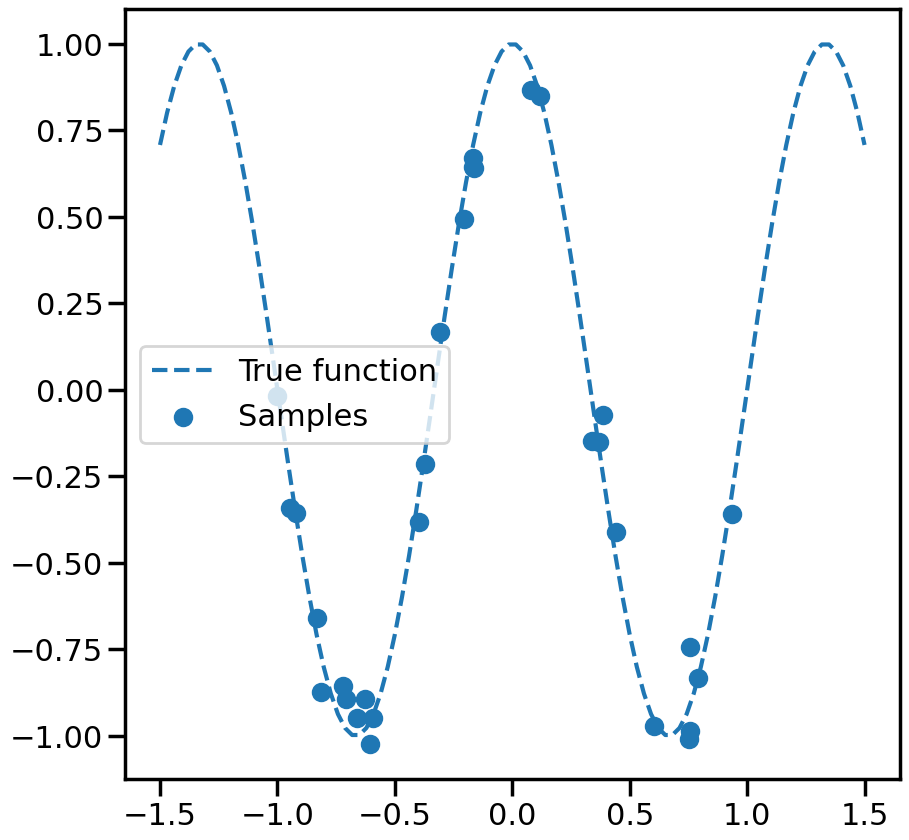

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
np.random.seed(1)

n_samples = 30

# True Function we want to estimate
true_fun = lambda X: np.cos(1.5 * np.pi * X)

# Noisy Samples from the true function
X = np.sort(2*np.random.rand(n_samples)-1)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(10,10))
# Plot the true function:
X_plot = np.linspace(-1.5, 1.5, 100)
plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
# Plot the data samples
plt.scatter(X,y, label="Samples")
plt.legend(loc="best")
plt.show()

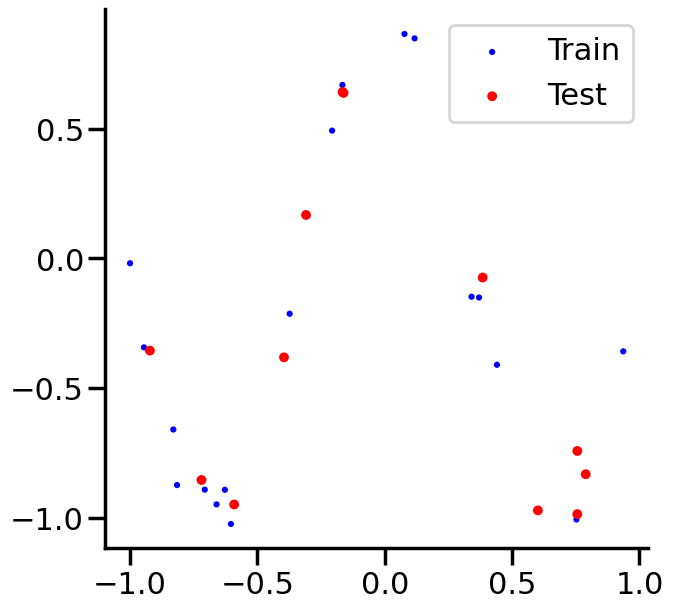

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=0)
plt.figure(figsize=(7,7))
# Plot the data samples
plt.scatter(X_train,y_train, label="Train", c='Blue', s=20, edgecolors='none')
plt.scatter(X_test,y_test, label="Test", c='Red', s=50, edgecolors='none')
#plt.plot(X_plot, true_fun(X_plot), 'g--',label="True function")
plt.legend(loc="best")
sns.despine()
plt.show()

In [3]:
# Convert the data into a shape and data-type that PyTorch likes
X_train = X_train.reshape(-1,1).astype(np.float32)
y_train = y_train.reshape(-1,1).astype(np.float32)

In [4]:
import torch
import torch.nn as nn

### Linear Regression

In [5]:
input_size  = 1
output_size = 1
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.1 # alpha
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [6]:
# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(X_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [20/500], Loss: 0.3699
Epoch [40/500], Loss: 0.3667
Epoch [60/500], Loss: 0.3665
Epoch [80/500], Loss: 0.3665
Epoch [100/500], Loss: 0.3665
Epoch [120/500], Loss: 0.3665
Epoch [140/500], Loss: 0.3665
Epoch [160/500], Loss: 0.3665
Epoch [180/500], Loss: 0.3665
Epoch [200/500], Loss: 0.3665
Epoch [220/500], Loss: 0.3665
Epoch [240/500], Loss: 0.3665
Epoch [260/500], Loss: 0.3665
Epoch [280/500], Loss: 0.3665
Epoch [300/500], Loss: 0.3665
Epoch [320/500], Loss: 0.3665
Epoch [340/500], Loss: 0.3665
Epoch [360/500], Loss: 0.3665
Epoch [380/500], Loss: 0.3665
Epoch [400/500], Loss: 0.3665
Epoch [420/500], Loss: 0.3665
Epoch [440/500], Loss: 0.3665
Epoch [460/500], Loss: 0.3665
Epoch [480/500], Loss: 0.3665
Epoch [500/500], Loss: 0.3665


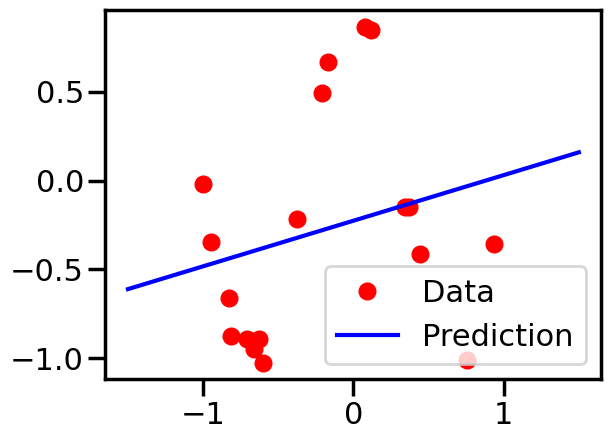

In [7]:
# Plot the graph
plt.plot(X_train, y_train, 'ro', label='Data')
#predicted = model(torch.from_numpy(X_train)).detach().numpy()
#plt.plot(X_train, predicted, 'b+',label='Predictions')
predicted = model(torch.from_numpy(X_plot.reshape(-1,1).astype(np.float32))).detach().numpy()
plt.plot(X_plot, predicted, 'b', label='Prediction')
plt.legend()
plt.show()

### Neural Network Examples

#### Example of Defining a Network via the full Module class

In [8]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()  
        # Fully-Connected Layer: 1 (input data) -> 5 (hidden node)
        self.fc1 = nn.Linear(input_size, hidden_size)  
        
        # Non-Linear Layer
        self.sigmoid = nn.Sigmoid()
        # You can try other kinds as well
        # self.relu = nn.ReLU()
        # self.elu = nn.ELU()
        
        
        # Fully-Connected Layer: 5 (hidden node) -> 1 (output)
        self.fc2 = nn.Linear(hidden_size, 1) 
    
    # Forward pass builds the model prediction from the inputs
    def forward(self, x):                              
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        return out
    
# Build the network -- is it not trained yet
model = Net(input_size=1, hidden_size=5)

#### Example of building a model using the `Sequential` helper function

In [9]:
input_size=1
hidden_size=4
model = nn.Sequential(
          nn.Linear(input_size, hidden_size),
          nn.Sigmoid(),
          nn.Linear(hidden_size, hidden_size),
          nn.ReLU(),
          nn.Linear(hidden_size, 1)
        )

#### Example using Python list expansions to help build deeper networks

In [10]:
input_size=1
hidden_size=7
num_hidden_layers = 3
activation = nn.ReLU

input_layer = [nn.Linear(input_size, hidden_size),
                activation()]
hidden_layers = num_hidden_layers*[nn.Linear(hidden_size, hidden_size), 
                                   activation()]
output_layer = [ nn.Linear(hidden_size, 1) ] 

# Stack them all together
layers = input_layer + hidden_layers + output_layer

print(layers)

# Use the * operator to "expand" or "unpack" the list
model = nn.Sequential(*layers)

[Linear(in_features=1, out_features=7, bias=True), ReLU(), Linear(in_features=7, out_features=7, bias=True), ReLU(), Linear(in_features=7, out_features=7, bias=True), ReLU(), Linear(in_features=7, out_features=7, bias=True), ReLU(), Linear(in_features=7, out_features=1, bias=True)]


### Now let's do the actual training

In [11]:
# What Loss function should we use? MSE!
criterion = nn.MSELoss()

# What Optimization procedure should we use?
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0)

In [12]:
### Train the model

# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

num_epochs = 5000
for epoch in range(num_epochs):

    ## Do Forward pass
    # Make predictions
    outputs = model(inputs)
    # Compute the loss function
    loss = criterion(outputs, targets)
    
    ## Update the model
    # Reset the optimizer gradients
    optimizer.zero_grad()
    # Compute the gradient of the loss function
    loss.backward()
    # Do an optimization step
    optimizer.step()
    
    # Print the loss
    if (epoch+1) % 200 == 0:
        print ('Epoch [{:4}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [ 200/5000], Loss: 0.0046
Epoch [ 400/5000], Loss: 0.0018
Epoch [ 600/5000], Loss: 0.0023
Epoch [ 800/5000], Loss: 0.0019
Epoch [1000/5000], Loss: 0.0019
Epoch [1200/5000], Loss: 0.0023
Epoch [1400/5000], Loss: 0.0023
Epoch [1600/5000], Loss: 0.0018
Epoch [1800/5000], Loss: 0.0026
Epoch [2000/5000], Loss: 0.0109
Epoch [2200/5000], Loss: 0.0027
Epoch [2400/5000], Loss: 0.0036
Epoch [2600/5000], Loss: 0.0019
Epoch [2800/5000], Loss: 0.0016
Epoch [3000/5000], Loss: 0.0159
Epoch [3200/5000], Loss: 0.0026
Epoch [3400/5000], Loss: 0.0026
Epoch [3600/5000], Loss: 0.0029
Epoch [3800/5000], Loss: 0.0031
Epoch [4000/5000], Loss: 0.0025
Epoch [4200/5000], Loss: 0.0020
Epoch [4400/5000], Loss: 0.0034
Epoch [4600/5000], Loss: 0.0017
Epoch [4800/5000], Loss: 0.0016
Epoch [5000/5000], Loss: 0.0016


Now let's plot the prediction:

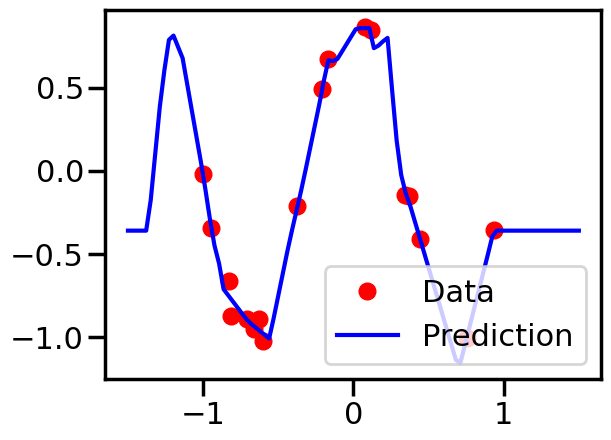

In [13]:
# Plot the graph
predicted = model(torch.from_numpy(X_train)).detach().numpy()
plt.plot(X_train, y_train, 'ro', label='Data')
#plt.plot(X_train, predicted, 'b+', label='Predictions')

predicted = model(torch.from_numpy(X_plot.reshape(-1,1).astype(np.float32))).detach().numpy()
plt.plot(X_plot, predicted, 'b', label='Prediction')
plt.legend()
plt.show()